## Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data_example.csv")

In [ ]:
print(df.head())
print(df.columns)

## Reshape the data (from wide to long)

In [2]:
df_long = df.melt(id_vars="Group", var_name="Year", value_name="Percentage")
#df_long["Year"] = df_long["Year"].astype(int)  # optional, for plotting

In [3]:
# Pivot for easier plotting with matplotlib
df_pivot = df_long.pivot(index="Year", columns="Group", values="Percentage")

In [ ]:
df_pivot

## Simple

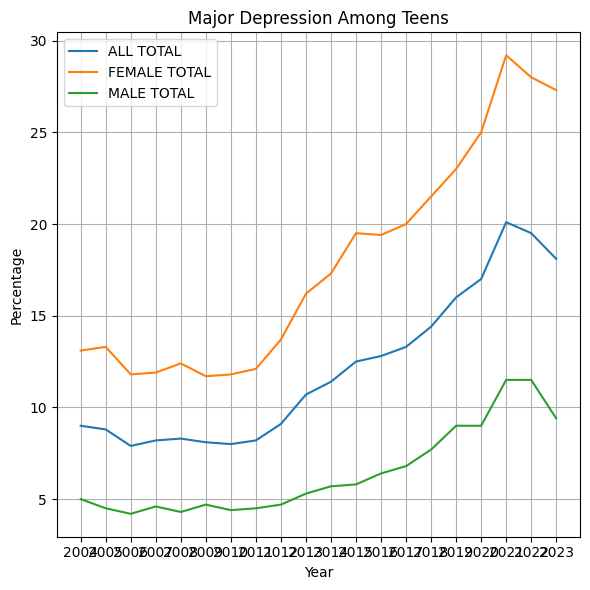

In [4]:
# Plot with Matplotlib
plt.figure(figsize=(6, 6))

for group in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[group], label=group)

# Tidy up the plot
plt.title("Major Depression Among Teens")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.grid(True)
plt.legend()
plt.xticks(df_pivot.index)  # Ensure only whole years appear

plt.tight_layout()
plt.show()

## Using fig, ax for greater creative freedom

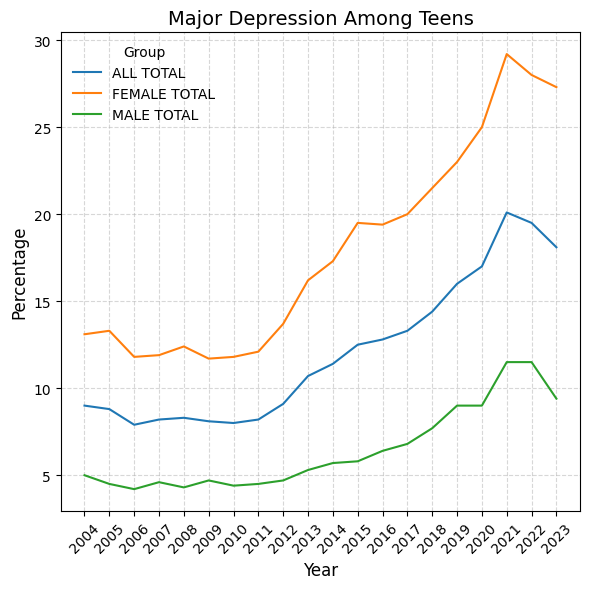

In [5]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot each line
for group in df_pivot.columns:
    ax.plot(df_pivot.index, df_pivot[group], label=group)

# Customize plot
ax.set_title("Major Depression Among Teens", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(title="Group", frameon=False)
ax.set_xticks(df_pivot.index)  # Ensure clean integer years

# Optional: Rotate x-axis labels for readability
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

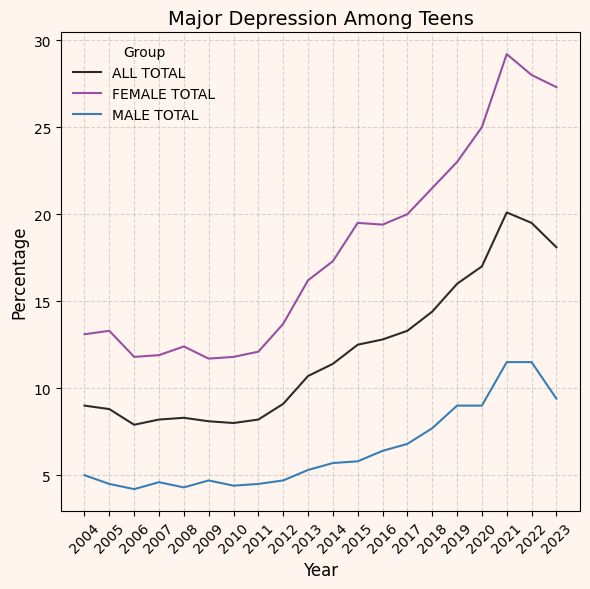

In [6]:

custom_colors = {'FEMALE TOTAL': '#984ea3', 'MALE TOTAL': '#377eb8', 'ALL TOTAL': '#2B2B2B',} #--new--#

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Set background colors #--new--#
ax.set_facecolor('seashell')
fig.set_facecolor('seashell')
fig.patch.set_edgecolor('seashell')
fig.patch.set_linewidth(10)

# Plot each line
for group in df_pivot.columns:
    ax.plot(df_pivot.index, df_pivot[group], color=custom_colors[group], label=group) #--new--#

# Customize plot
ax.set_title("Major Depression Among Teens", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(title="Group", frameon=False)
ax.set_xticks(df_pivot.index)  # Ensure clean integer years

# Optional: Rotate x-axis labels for readability
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

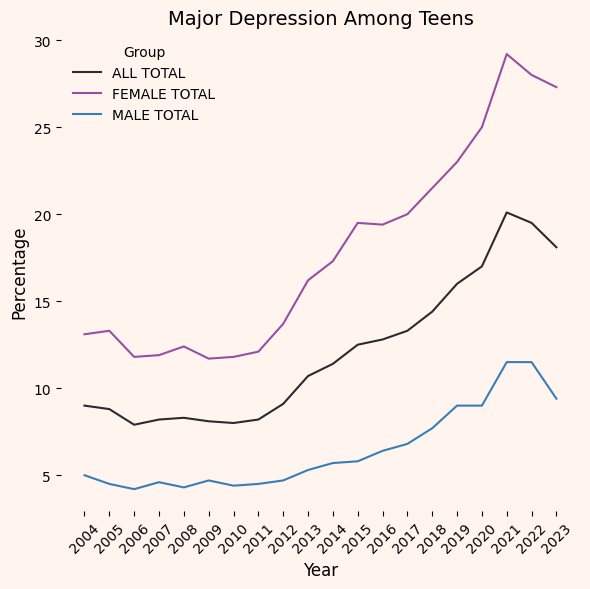

In [7]:
custom_colors = {'FEMALE TOTAL': '#984ea3', 'MALE TOTAL': '#377eb8', 'ALL TOTAL': '#2B2B2B',}

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Set background colors
ax.set_facecolor('seashell')
fig.set_facecolor('seashell')
fig.patch.set_edgecolor('seashell')
fig.patch.set_linewidth(10)

# Hide spines and legend #--new--#
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Plot each line
for group in df_pivot.columns:
    ax.plot(df_pivot.index, df_pivot[group], color=custom_colors[group],label=group)

# Customize plot
ax.set_title("Major Depression Among Teens", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
# ax.grid(True, linestyle="--", alpha=0.5) - #--new--# remove grid
ax.legend(title="Group", frameon=False)
ax.set_xticks(df_pivot.index)  # Ensure clean integer years

# Optional: Rotate x-axis labels for readability
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

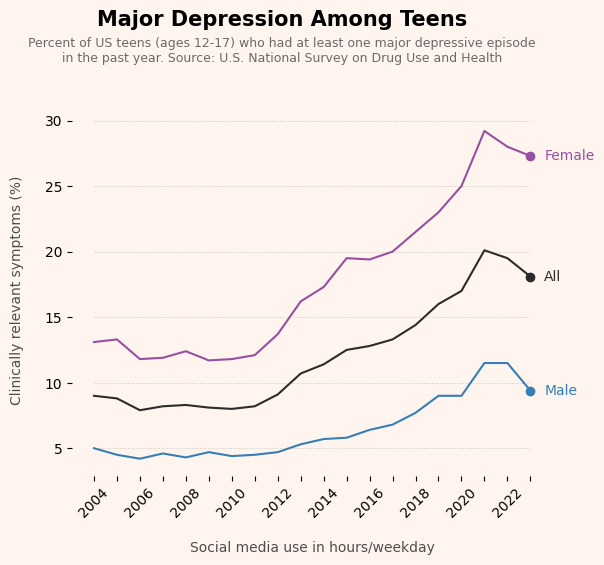

In [8]:
custom_colors = {'FEMALE TOTAL': '#984ea3', 'MALE TOTAL': '#377eb8', 'ALL TOTAL': '#2B2B2B',}

label_map = {
    'FEMALE TOTAL': 'Female',
    'MALE TOTAL': 'Male',
    'ALL TOTAL': 'All'
}

# Shades of gray #--new--#
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"

df_pivot.index = df_pivot.index.astype(int)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Set background colors
ax.set_facecolor('seashell')
fig.set_facecolor('seashell')
fig.patch.set_edgecolor('seashell')
fig.patch.set_linewidth(10)

label_map = {
    'FEMALE TOTAL': 'Female',
    'MALE TOTAL': 'Male',
    'ALL TOTAL': 'All'
}

# Plot each line and annotate the final point
for group in df_pivot.columns:
    years = df_pivot.index
    values = df_pivot[group]

    # Plot the line
    ax.plot(years, values, color=custom_colors[group])

    # Plot final dot and label
    ax.plot(years[-1], values.iloc[-1], 'o', color=custom_colors[group])
    ax.text(years[-1] + 0.6, values.iloc[-1], label_map[group],
            color=custom_colors[group], fontsize=10, va='center', fontname="DejaVu Sans")

# Horizontal dotted lines at 5, 10, 15, 20, 25, 30
for y in range(5, 35, 5):
    ax.hlines(y, xmin=df_pivot.index.min(), xmax=df_pivot.index.max(),
              color='gray', linestyle=':', linewidth=0.7, alpha=0.4)

# Hide spines and legend #--new--#
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# X-axis ticks: label every other year
years = df_pivot.index
ax.set_xticks(years)
ax.set_xticklabels([str(y) if i % 2 == 0 else '' for i, y in enumerate(years)], rotation=45)

# Optional: Rotate x-axis labels for readability
ax.tick_params(axis='x', rotation=45)

# Tight layout for cleaner spacing
fig.tight_layout()

# Titles and subtitle
fig.text(
    0.47, 0.93,
    "Major Depression Among Teens",
    color="black", fontsize=15, fontname="DejaVu Sans", weight="bold", ha="center"
)
subtitle = [
    "Percent of US teens (ages 12-17) who had at least one major depressive episode",
    "in the past year. Source: U.S. National Survey on Drug Use and Health"
]
fig.text(
    0.47, 0.87,
    "\n".join(subtitle),
    color="dimgray", fontname="DejaVu Sans", fontsize=9, ha="center"
)

plt.subplots_adjust(left=0.12, right=0.92, top=0.80, bottom=0.18)

ax.set_xlabel('Social media use in hours/weekday', labelpad=15, fontname="DejaVu Sans", color=GREY30)
ax.set_ylabel('Clinically relevant symptoms (%)', labelpad=15, fontname="DejaVu Sans", color=GREY30)

plt.show()

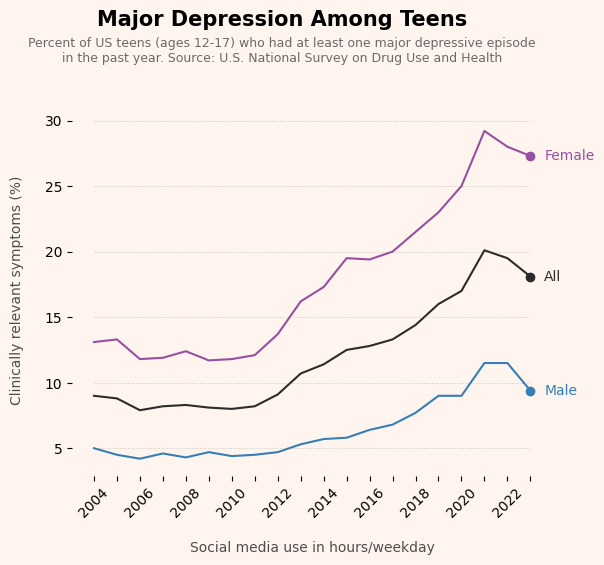

In [9]:
# Declare colors
custom_colors = {'FEMALE TOTAL': '#984ea3', 'MALE TOTAL': '#377eb8', 'ALL TOTAL': '#2B2B2B',}

# Inline label definitions #--new--#
label_map = {
    'FEMALE TOTAL': 'Female',
    'MALE TOTAL': 'Male',
    'ALL TOTAL': 'All'
}

# Shades of gray #--new--#
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"

df_pivot.index = df_pivot.index.astype(int)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Set background colors
ax.set_facecolor('seashell')
fig.set_facecolor('seashell')
fig.patch.set_edgecolor('seashell')
fig.patch.set_linewidth(10)

# Plot each line and annotate the final point
for group in df_pivot.columns:
    years = df_pivot.index
    values = df_pivot[group]

    # Plot the line
    ax.plot(years, values, color=custom_colors[group])

    # Plot final dot and label
    ax.plot(years[-1], values.iloc[-1], 'o', color=custom_colors[group])
    ax.text(years[-1] + 0.6, values.iloc[-1], label_map[group],
            color=custom_colors[group], fontsize=10, va='center', fontname="DejaVu Sans")

# Horizontal dotted lines at 5, 10, 15, 20, 25, 30 #--new--#
for y in range(5, 35, 5):
    ax.hlines(y, xmin=df_pivot.index.min(), xmax=df_pivot.index.max(),
              color='gray', linestyle=':', linewidth=0.7, alpha=0.4)

# Hide spines and legend
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# X-axis ticks: label every other year #--new--#
years = df_pivot.index
ax.set_xticks(years)
ax.set_xticklabels([str(y) if i % 2 == 0 else '' for i, y in enumerate(years)], rotation=45)

# Rotate x-axis labels for readability
ax.tick_params(axis='x', rotation=45)

# Tight layout for cleaner spacing
fig.tight_layout()

# Titles and subtitle
fig.text(
    0.47, 0.93,
    "Major Depression Among Teens",
    color="black", fontsize=15, fontname="DejaVu Sans", weight="bold", ha="center"
)
subtitle = [
    "Percent of US teens (ages 12-17) who had at least one major depressive episode",
    "in the past year. Source: U.S. National Survey on Drug Use and Health"
]
fig.text(
    0.47, 0.87,
    "\n".join(subtitle),
    color="dimgray", fontname="DejaVu Sans", fontsize=9, ha="center"
)

plt.subplots_adjust(left=0.12, right=0.92, top=0.80, bottom=0.18)

ax.set_xlabel('Social media use in hours/weekday', labelpad=15, fontname="DejaVu Sans", color=GREY30)
ax.set_ylabel('Clinically relevant symptoms (%)', labelpad=15, fontname="DejaVu Sans", color=GREY30)

plt.show()

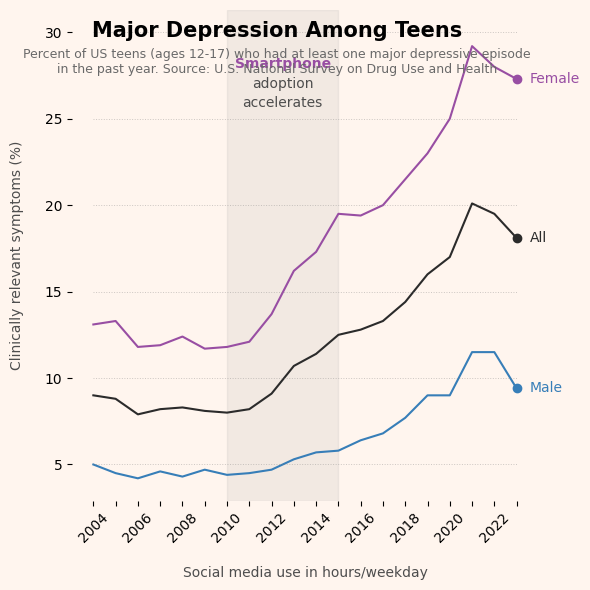

In [14]:
from highlight_text import ax_text

# Declare colors
custom_colors = {'FEMALE TOTAL': '#984ea3', 'MALE TOTAL': '#377eb8', 'ALL TOTAL': '#2B2B2B',}

# Inline label definitions #--new--#
label_map = {
    'FEMALE TOTAL': 'Female',
    'MALE TOTAL': 'Male',
    'ALL TOTAL': 'All'
}

# Shades of gray #--new--#
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"

df_pivot.index = df_pivot.index.astype(int)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Set background colors
ax.set_facecolor('seashell')
fig.set_facecolor('seashell')
fig.patch.set_edgecolor('seashell')
fig.patch.set_linewidth(10)

# Plot each line and annotate the final point
for group in df_pivot.columns:
    years = df_pivot.index
    values = df_pivot[group]

    # Plot the line
    ax.plot(years, values, color=custom_colors[group])

    # Plot final dot and label
    ax.plot(years[-1], values.iloc[-1], 'o', color=custom_colors[group])
    ax.text(years[-1] + 0.6, values.iloc[-1], label_map[group],
            color=custom_colors[group], fontsize=10, va='center', fontname="DejaVu Sans")

# Horizontal dotted lines at 5, 10, 15, 20, 25, 30 #--new--#
for y in range(5, 35, 5):
    ax.hlines(y, xmin=df_pivot.index.min(), xmax=df_pivot.index.max(),
              color='gray', linestyle=':', linewidth=0.7, alpha=0.4)

# Hide spines and legend
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# X-axis ticks: label every other year #--new--#
years = df_pivot.index
ax.set_xticks(years)
ax.set_xticklabels([str(y) if i % 2 == 0 else '' for i, y in enumerate(years)], rotation=45)

# Rotate x-axis labels for readability
ax.tick_params(axis='x', rotation=45)

# Tight layout for cleaner spacing


ax.axvspan(2010, 2015, color='gray', alpha=0.1)

# Highlight annotation
highlight_string = "{Smartphone}\nadoption\naccelerates"
highlight_textprops = [{"color": "#984ea3", "weight": "bold"}]
ax_text(x=2012.5, y=25.5, s=highlight_string, ax=ax,
        highlight_textprops=highlight_textprops,
        delim=("{", "}"), fontsize=10, color=GREY30,
        ha="center", va="bottom", textalign="center")

# Titles and subtitle
fig.text(
    0.47, 0.93,
    "Major Depression Among Teens",
    color="black", fontsize=15, fontname="DejaVu Sans", weight="bold", ha="center"
)
subtitle = [
    "Percent of US teens (ages 12-17) who had at least one major depressive episode",
    "in the past year. Source: U.S. National Survey on Drug Use and Health"
]
fig.text(
    0.47, 0.87,
    "\n".join(subtitle),
    color="dimgray", fontname="DejaVu Sans", fontsize=9, ha="center"
)

plt.subplots_adjust(left=0.12, right=0.92, top=0.80, bottom=0.18)

ax.set_xlabel('Social media use in hours/weekday', labelpad=15, fontname="DejaVu Sans", color=GREY30)
ax.set_ylabel('Clinically relevant symptoms (%)', labelpad=15, fontname="DejaVu Sans", color=GREY30)

fig.tight_layout()
plt.show()